In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


## Importing the libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

## Reading CSV

In [106]:
df = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [107]:
df.shape


(51717, 17)

In [108]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [109]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [110]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [111]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Dropping Duplicaet

In [113]:
df.drop_duplicates(inplace = True)
df.shape

(51717, 17)

In [114]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [115]:
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [116]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [117]:
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [118]:
##Filling the null values in Rate Column with Mean

In [119]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()


/tmp/ipykernel_33/1796857288.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [121]:
##dropping the null values

In [122]:
df.dropna(inplace = True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [123]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,menu_item,Type,listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [124]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [125]:
df['listed_in(city)'].unique()


array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [126]:
## Listen in (city),location and both are there,lets keep only one

In [127]:
df = df.drop(['listed_in(city)'], axis = 1)
df['Cost2plates'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [128]:
##Removing from cost2plates column

In [129]:
df['Cost2plates'] = df['Cost2plates'].apply(lambda x : float(x.replace(',','')))


In [130]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,menu_item,Type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


In [131]:
## Cleaning Rest Type Column

In [132]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Casual Dining                7365
Quick Bites                  5243
Cafe                         2329
Dessert Parlor               1076
Casual Dining, Bar            987
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [133]:
rest_types

rest_type
Casual Dining                7365
Quick Bites                  5243
Cafe                         2329
Dessert Parlor               1076
Casual Dining, Bar            987
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [134]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Casual Dining, Bar           987
Delivery                     670
Bar                          357
Bar, Casual Dining           343
Takeaway, Delivery           343
                            ... 
Fine Dining, Microbrewery      5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: count, Length: 69, dtype: int64

## Making the Rest Types less than 1000 in frequency as others

In [135]:
def handle_rest_type(value):
    if (value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Casual Dining     7365
others            7209
Quick Bites       5243
Cafe              2329
Dessert Parlor    1076
Name: count, dtype: int64

## Cleaning location Column

In [136]:
location = df['location'].value_counts(ascending=False)

location_lessthan300 = location[location<100]

def handle_location(value):
    if (value in location_lessthan300):
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
Koramangala 5th Block    1784
BTM                      1460
Indiranagar              1350
others                   1254
HSR                      1162
Jayanagar                1047
JP Nagar                 1025
Whitefield                824
Koramangala 7th Block     725
Koramangala 6th Block     720
Marathahalli              683
Koramangala 4th Block     644
MG Road                   596
Brigade Road              570
Church Street             508
Bannerghatta Road         497
Ulsoor                    477
Koramangala 1st Block     467
Kalyan Nagar              467
Bellandur                 462
Sarjapur Road             456
Lavelle Road              445
Residency Road            442
Banashankari              390
Malleshwaram              366
Richmond Road             351
Cunningham Road           333
Electronic City           327
Brookefield               307
St. Marks Road            304
New BEL Road              303
Frazer Town               293
Basavanagudi              286
K

In [137]:
#Cleaning Cuisines Column

In [138]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<25]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                       10964
North Indian                                  1144
North Indian, Chinese                          777
South Indian                                   360
Cafe                                           273
                                             ...  
North Indian, Italian                           26
Cafe, Italian, Desserts                         26
Rajasthani, North Indian                        26
Continental, Cafe, Desserts, Salad, Momos       25
Andhra, North Indian                            25
Name: count, Length: 171, dtype: int64

In [139]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,menu_item,Type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


## Data is Clean , Let's jump to visualization

In [140]:
##Count plot of various locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Richmond Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'HSR'),
  Text(14, 0, 'Old Airport Road'),
  Text(15, 0, 'Indiranagar'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Lavelle Road'),
  Text(20, 0, 'Church Street'),
  Text(21, 0, 'Ulsoor'),
  Text(22, 0, 'Residency Road'),
  Text(23, 0, 'St. Marks Road'),
  Text(24, 0, 'Cunningham Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Ko

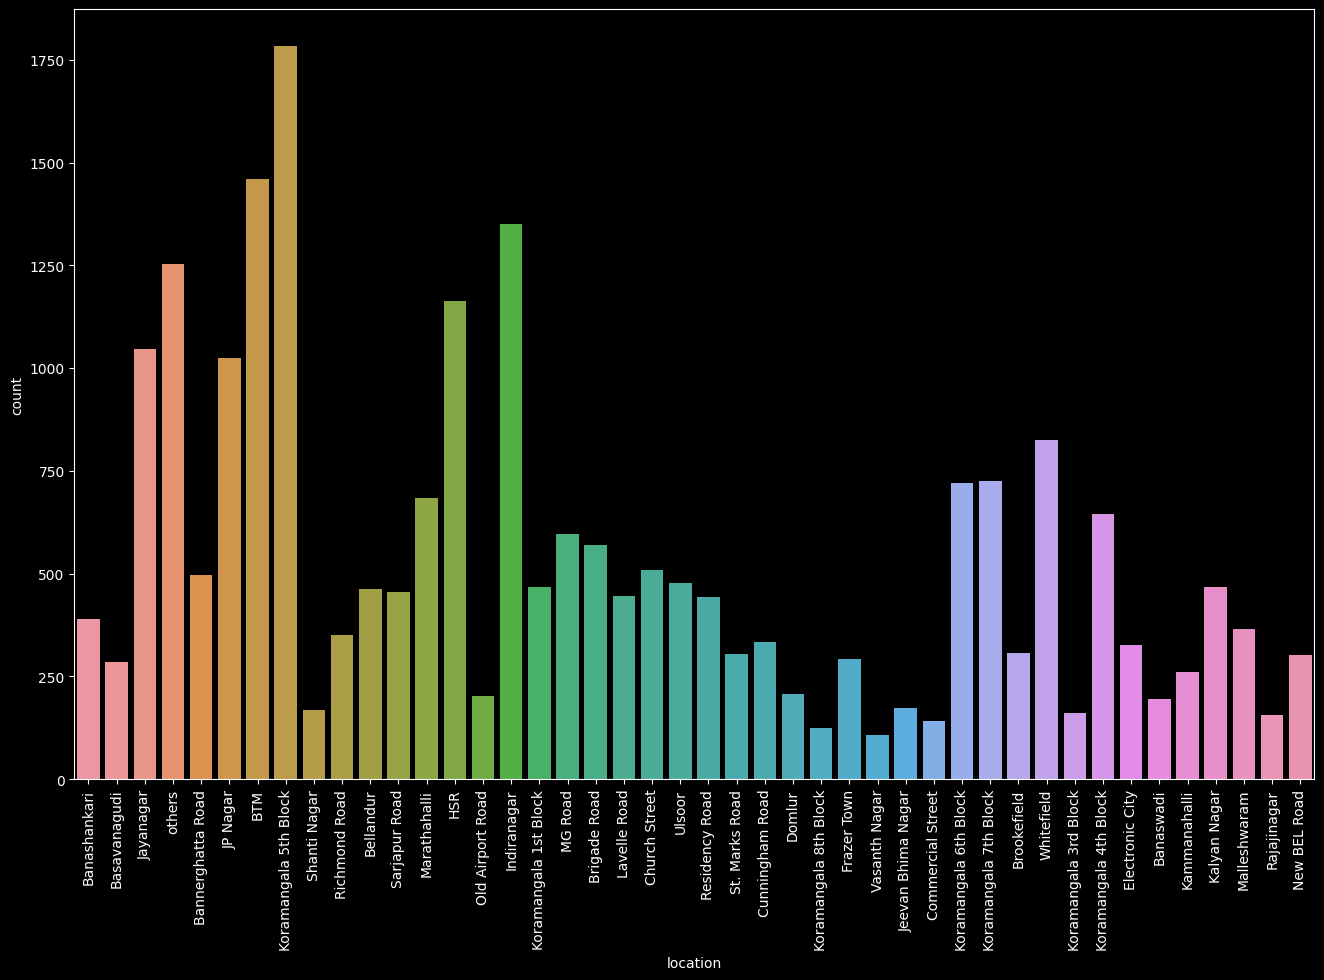

In [141]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x=df['location'])
plt.xticks(rotation=90)

In [142]:
!pip install plotly

In [143]:
import plotly.express as px
fig = px.histogram(df, x="location",color_discrete_sequence=['indianred'] )
fig.show()

<Axes: xlabel='online_order', ylabel='count'>

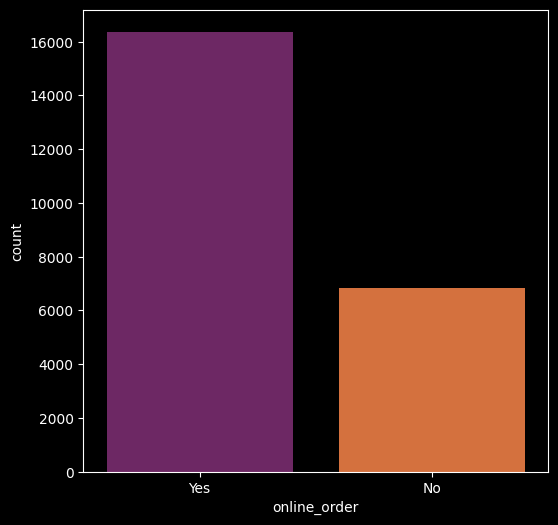

In [144]:
plt.figure(figsize = (6,6))
sns.countplot(x=df['online_order'], palette = 'inferno')

In [145]:
##Visualizing book table

<Axes: xlabel='book_table', ylabel='count'>

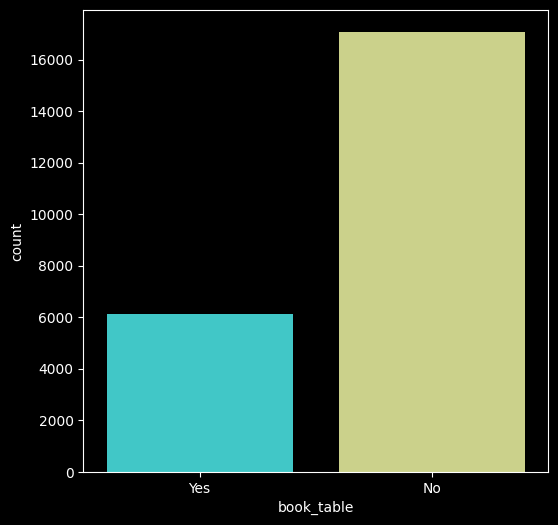

In [146]:
plt.figure(figsize = (6,6))
sns.countplot(x=df['book_table'], palette = 'rainbow')

In [147]:
##visualzing the online order vs Rate

In [ ]:
for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.scatter(df_2007,
                     x="gdpPercap", y="lifeExp", size="pop", color="continent",
                     log_x=True, size_max=60,
                     template=template, title="Gapminder 2007: '%s' theme" % template)
    fig.show()

In [154]:
template ="seaborn"

In [155]:
fig = px.box(df ,x = df['online_order'],y="rate",template=template)
fig.show()

<Axes: xlabel='online_order', ylabel='rate'>

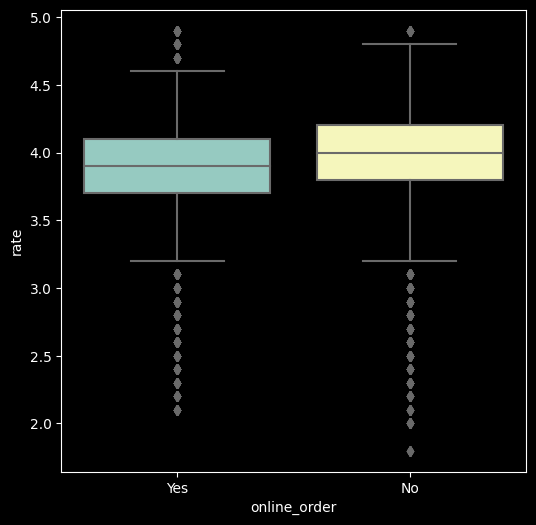

In [149]:
plt.figure(figsize = (6,6))
sns.boxplot(x = df['online_order'], y = df['rate'])

In [156]:
## Visualizing book table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

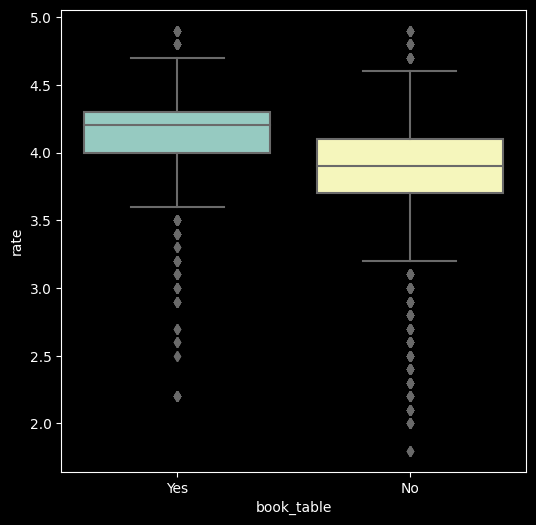

In [157]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

In [158]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

/tmp/ipykernel_33/2546502282.py:4: FutureWarning:

The provided callable <function sum at 0x7bf5cc47b0a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



name      
online_order            No   Yes
location                        
BTM                    267  1193
Banashankari           103   287
Banaswadi               40   156
Bannerghatta Road      112   385
Basavanagudi            84   202
Bellandur              110   352
Brigade Road           225   345
Brookefield             61   246
Church Street          191   317
Commercial Street       65    76
Cunningham Road         62   271
Domlur                  92   114
Electronic City         98   229
Frazer Town             82   211
HSR                    151  1011
Indiranagar            398   952
JP Nagar               311   714
Jayanagar              205   842
Jeevan Bhima Nagar      29   145
Kalyan Nagar           126   341
Kammanahalli            55   205
Koramangala 1st Block   57   410
Koramangala 3rd Block   48   114
Koramangala 4th Block  254   390
Koramangala 5th Block  554  1230
Koramangala 6th Block  231   489
Koramangala 7th Block  198   527
Koramangala 8th Block   24   100
Lavelle Road           254   191
MG Road                321   275
Malleshwaram           126   240
Marathahalli           161   522
New BEL Road            64   239
Old Airport Road        76   126
Rajajinagar             46   111
Residency Road         267   175
Richmond Road          202   149
Sarjapur Road          109   347
Shanti Nagar            45   122
St. Marks Road         137   167
Ulsoor                 170   307
Vasanth Nagar           37    71
Whitefield             264   560
others                 334   920

<Axes: xlabel='location'>

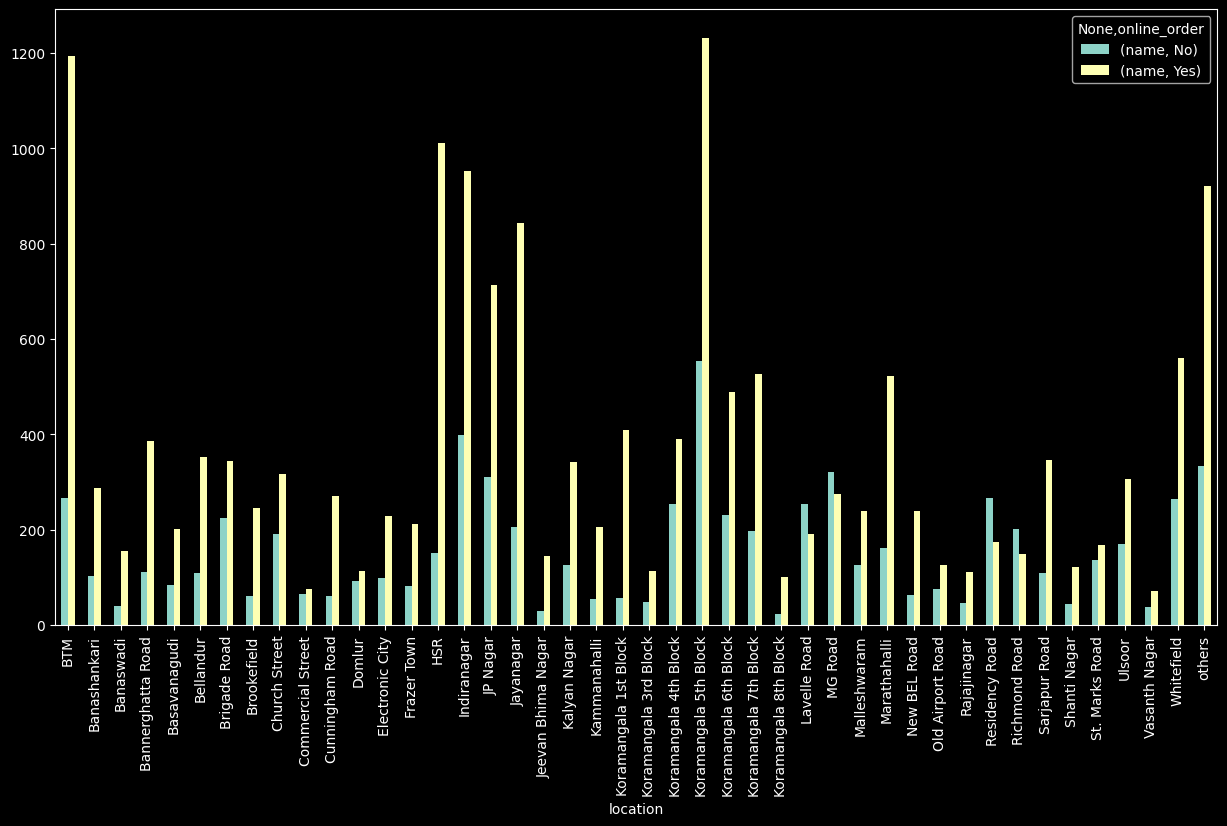

In [159]:
df1.plot(kind = 'bar', figsize = (15,8))


In [160]:
##Visualizing book table facily,location wise

In [161]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

/tmp/ipykernel_33/814380054.py:4: FutureWarning:

The provided callable <function sum at 0x7bf5cc47b0a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



name     
book_table               No  Yes
location                        
BTM                    1322  138
Banashankari            335   55
Banaswadi               188    8
Bannerghatta Road       406   91
Basavanagudi            276   10
Bellandur               366   96
Brigade Road            399  171
Brookefield             239   68
Church Street           326  182
Commercial Street       141    0
Cunningham Road         164  169
Domlur                  151   55
Electronic City         243   84
Frazer Town             285    8
HSR                     960  202
Indiranagar             916  434
JP Nagar                726  299
Jayanagar               781  266
Jeevan Bhima Nagar      170    4
Kalyan Nagar            331  136
Kammanahalli            211   49
Koramangala 1st Block   417   50
Koramangala 3rd Block    52  110
Koramangala 4th Block   334  310
Koramangala 5th Block  1092  692
Koramangala 6th Block   607  113
Koramangala 7th Block   561  164
Koramangala 8th Block   107   17
Lavelle Road            213  232
MG Road                 278  318
Malleshwaram            277   89
Marathahalli            522  161
New BEL Road            251   52
Old Airport Road        149   53
Rajajinagar             116   41
Residency Road          291  151
Richmond Road           235  116
Sarjapur Road           304  152
Shanti Nagar            109   58
St. Marks Road          180  124
Ulsoor                  327  150
Vasanth Nagar            91   17
Whitefield              579  245
others                 1058  196

<Axes: xlabel='location'>

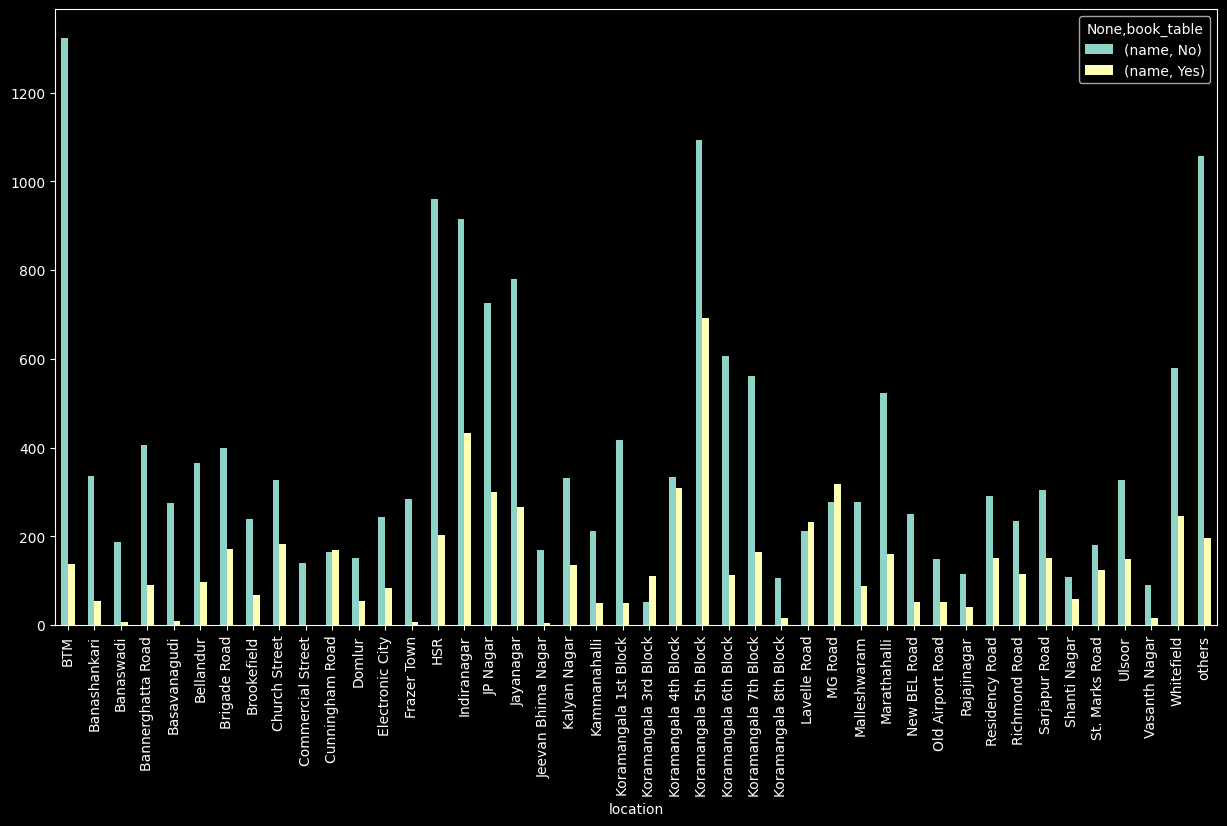

In [162]:
df2.plot(kind = 'bar', figsize = (15,8))


<Axes: xlabel='Type', ylabel='rate'>

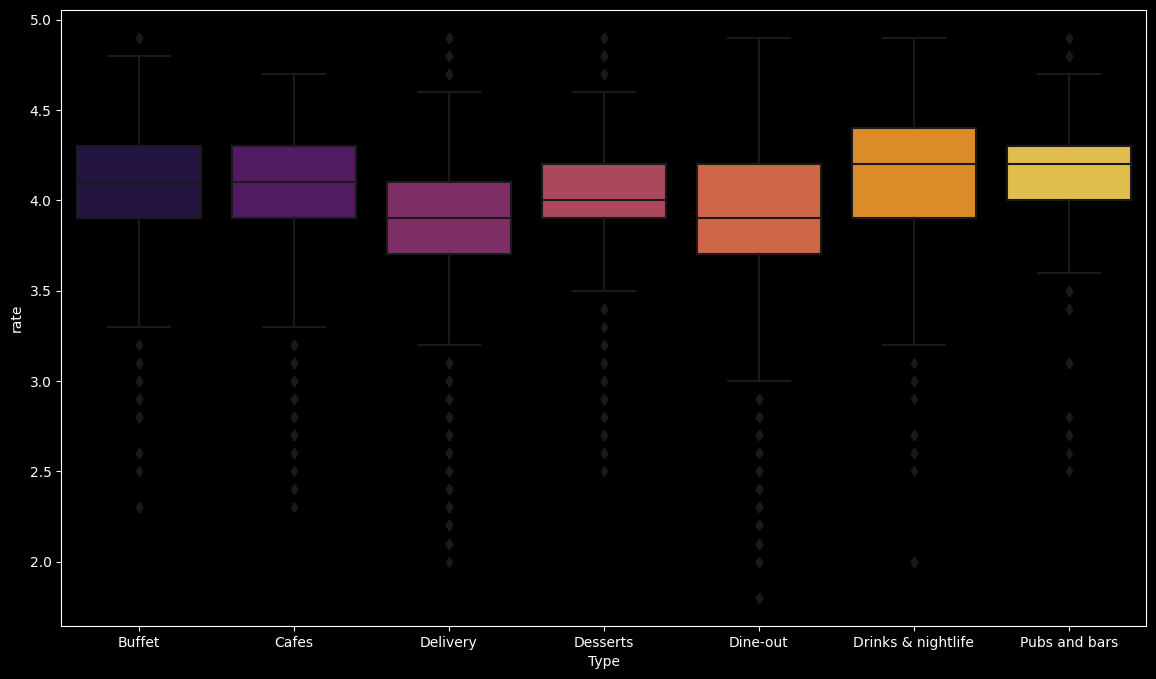

In [163]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Richmond Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'HSR'),
  Text(14, 0, 'Old Airport Road'),
  Text(15, 0, 'Indiranagar'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Lavelle Road'),
  Text(20, 0, 'Church Street'),
  Text(21, 0, 'Ulsoor'),
  Text(22, 0, 'Residency Road'),
  Text(23, 0, 'St. Marks Road'),
  Text(24, 0, 'Cunningham Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Ko

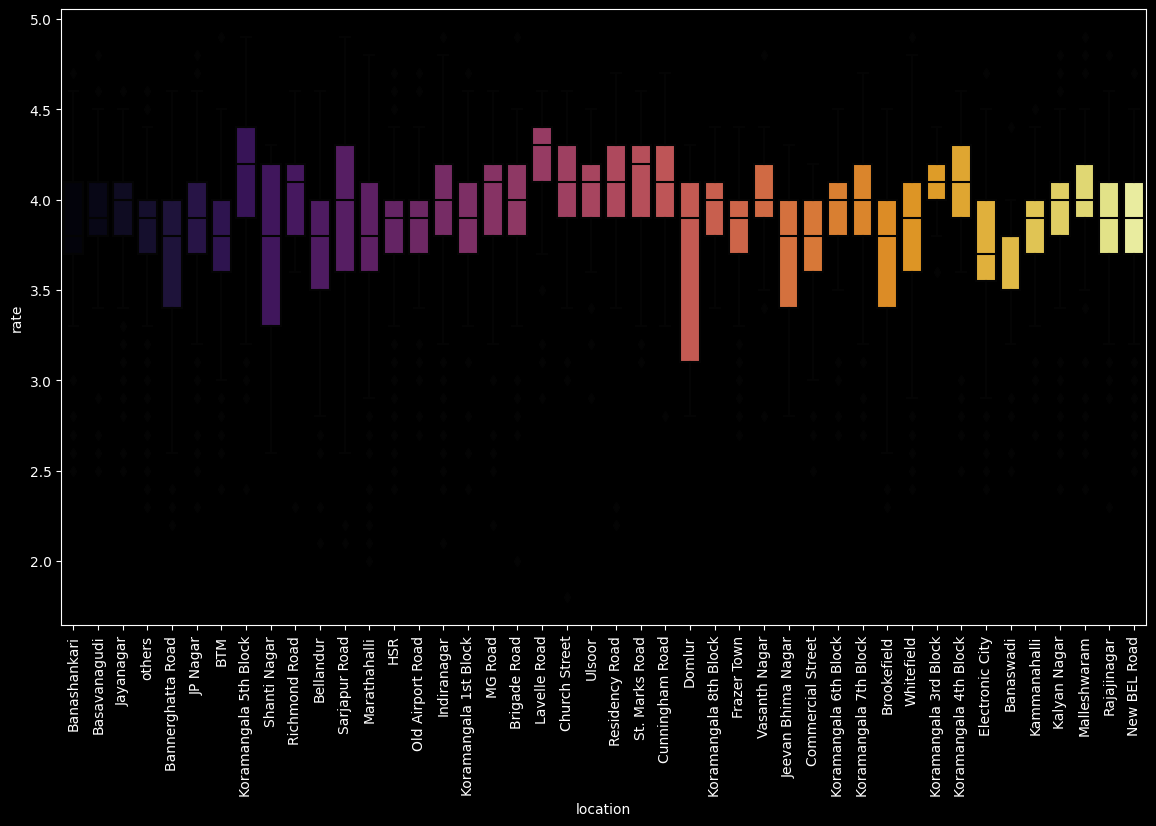

In [167]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'location', y = 'rate', data = df, palette = 'inferno')
plt.xticks(rotation=90)

In [168]:
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

/tmp/ipykernel_33/1140243432.py:4: FutureWarning:

The provided callable <function sum at 0x7bf5cc47b0a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       18    36      884       51      456   
Banashankari               7    24      191       19      141   
Banaswadi                  0     8       94        8       82   
Bannerghatta Road          8    19      252       28      180   
Basavanagudi               4    10      136       15      116   
Bellandur                 26    11      211       22      165   
Brigade Road              20    20      202       42      213   
Brookefield                6    15      150       14      118   
Church Street             19    40      178       23      197   
Commercial Street          0     0       47       24       70   
Cunningham Road           23    23      145       17      110   
Domlur                    14     4       98       11       61   
Electronic City           17    11      126       15      134   
Frazer Town                1     7      184       21       77   
HSR                       17    36      759       54      270   
Indiranagar               36    81      668       87      358   
JP Nagar                  34    51      470       63      356   
Jayanagar                 25    55      572       72      311   
Jeevan Bhima Nagar         0     2       92        4       76   
Kalyan Nagar               9    27      193       33      187   
Kammanahalli               2    10      131        9      106   
Koramangala 1st Block      3    18      269       17      148   
Koramangala 3rd Block     19    20       44        9       57   
Koramangala 4th Block     16    39      259       41      209   
Koramangala 5th Block     65   124      710      148      601   
Koramangala 6th Block     18    36      315       44      258   
Koramangala 7th Block     25    26      277       68      287   
Koramangala 8th Block      0    10       73       12       28   
Lavelle Road              29    22      101       29      178   
MG Road                   44    43      144       29      256   
Malleshwaram              11    14      119       27      163   
Marathahalli              27     8      354       18      251   
New BEL Road               4    20      157       14       93   
Old Airport Road          10     2       87       11       73   
Rajajinagar               10     0       68        6       62   
Residency Road            20    20      111       42      191   
Richmond Road             54    10       86       25      164   
Sarjapur Road             26    11      207       25      146   
Shanti Nagar               5     4       79        8       60   
St. Marks Road             5    10      101       10      120   
Ulsoor                    16    43      170       27      184   
Vasanth Nagar              1    13       55        7       27   
Whitefield                21    27      360       39      319   
others                    47    37      699       45      376   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                    9             6  
Banashankari                           8             0  
Banaswadi                              4             0  
Bannerghatta Road                      8             2  
Basavanagudi                           5             0  
Bellandur                             15            12  
Brigade Road                          53            20  
Brookefield                            4             0  
Church Street                         31            20  
Commercial Street                      0             0  
Cunningham Road                       11             4  
Domlur                                10             8  
Electronic City                       12            12  
Frazer Town                            1             2  

<Axes: xlabel='location'>

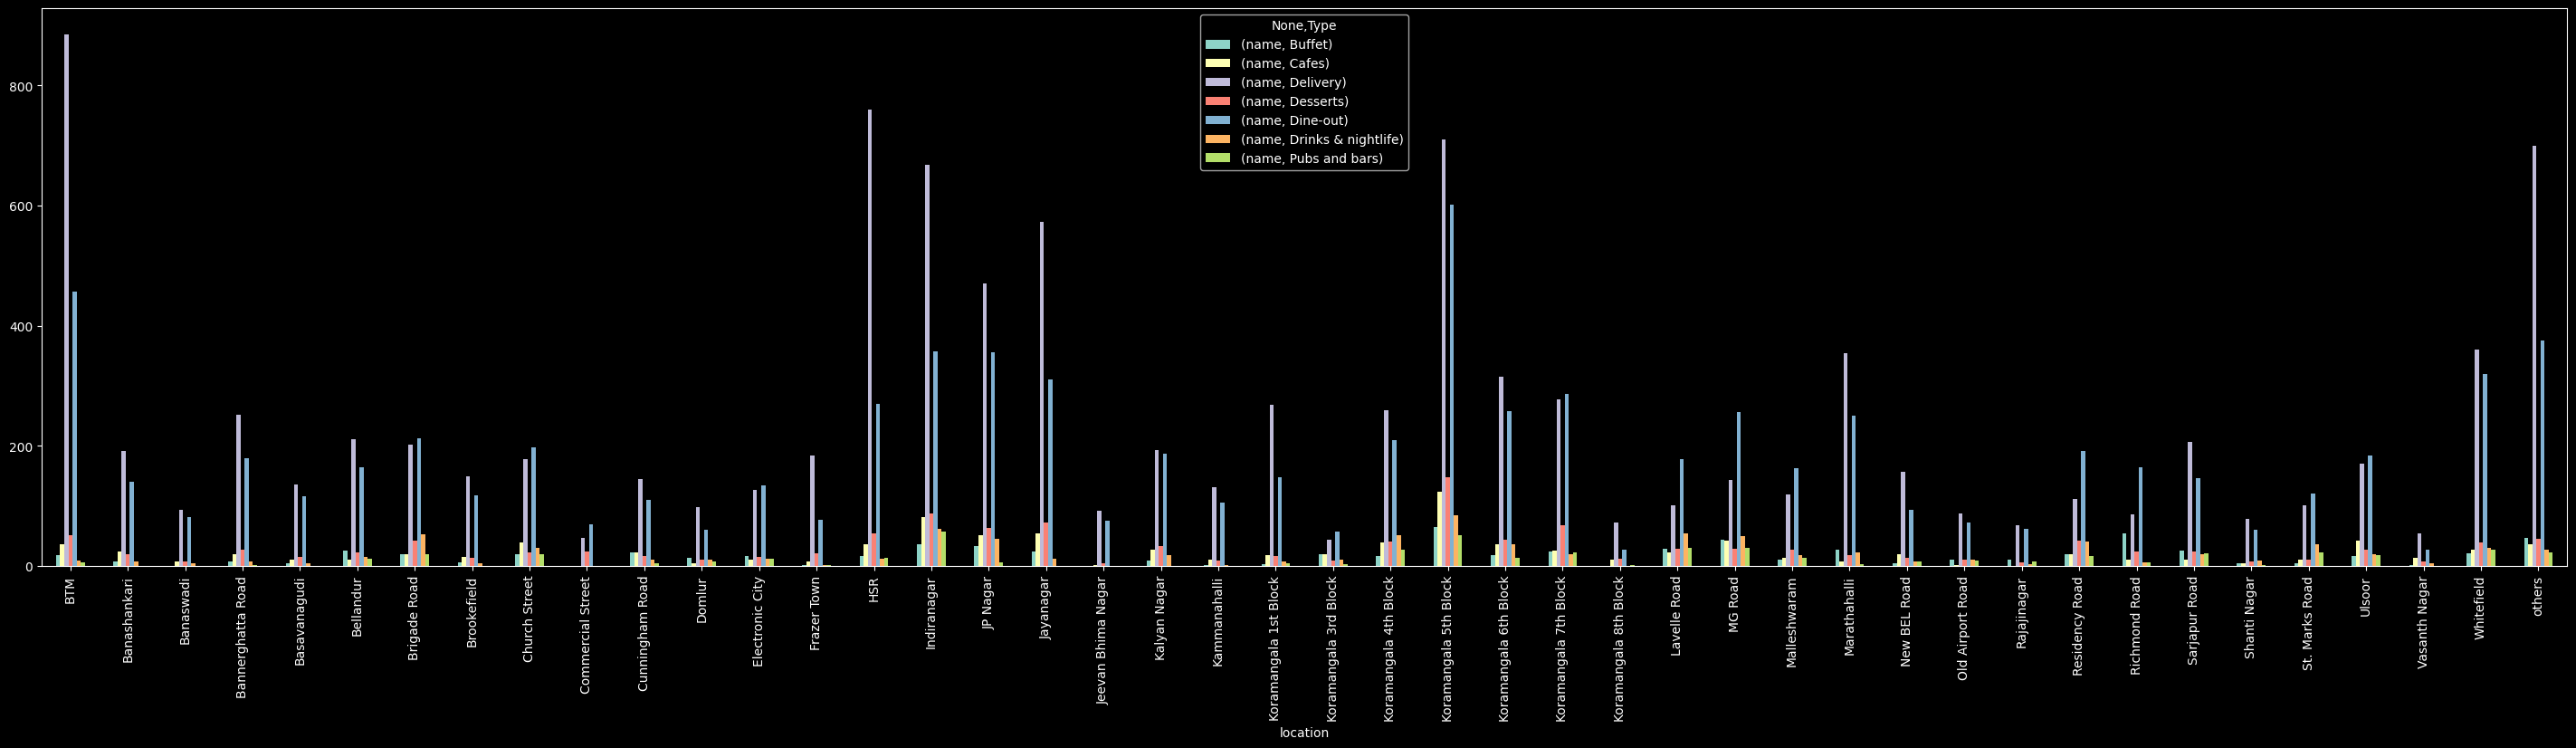

In [169]:
df3.plot(kind = 'bar', figsize = (36,8))


In [170]:
##No of votes , Location wise

In [171]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2197617
Indiranagar,1150323
Koramangala 4th Block,656372
Church Street,593580
JP Nagar,566330


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Lavelle Road'),
  Text(6, 0, 'Koramangala 7th Block'),
  Text(7, 0, 'BTM'),
  Text(8, 0, 'Jayanagar'),
  Text(9, 0, 'HSR'),
  Text(10, 0, 'Koramangala 6th Block'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'others'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'New BEL Road'),
  Text(25, 0, 'U

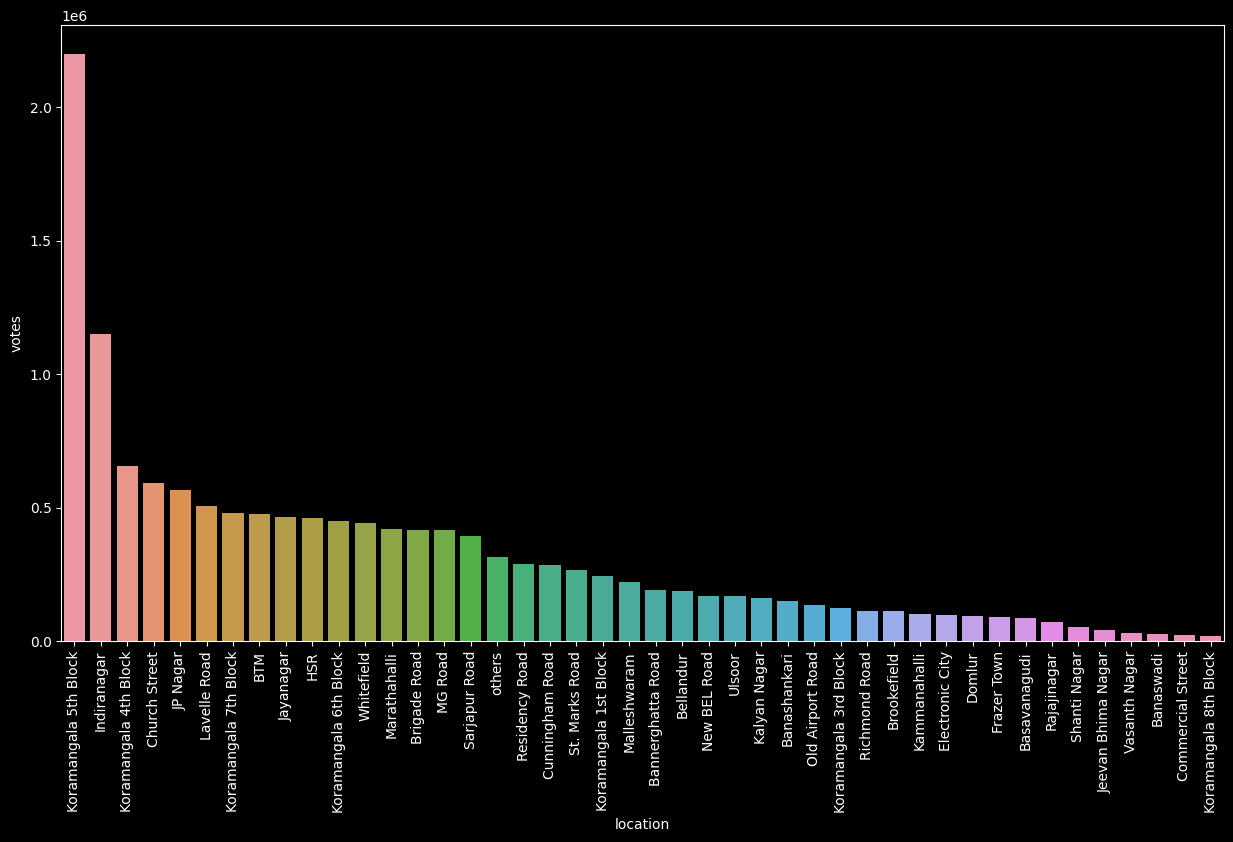

In [173]:
plt.figure(figsize = (15,8))
sns.barplot(x=df5.index ,y= df5['votes'])
plt.xticks(rotation = 90)

In [174]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost2plates,reviews_list,menu_item,Type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


In [175]:
##Visualizing the top cuisines

In [176]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
others,7560246
North Indian,487386
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Mughlai, South Indian, Chinese",227930


In [177]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,487386
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Mughlai, South Indian, Chinese",227930
"North Indian, Chinese",219244


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169]),
 [Text(0, 0, 'North Indian'),
  Text

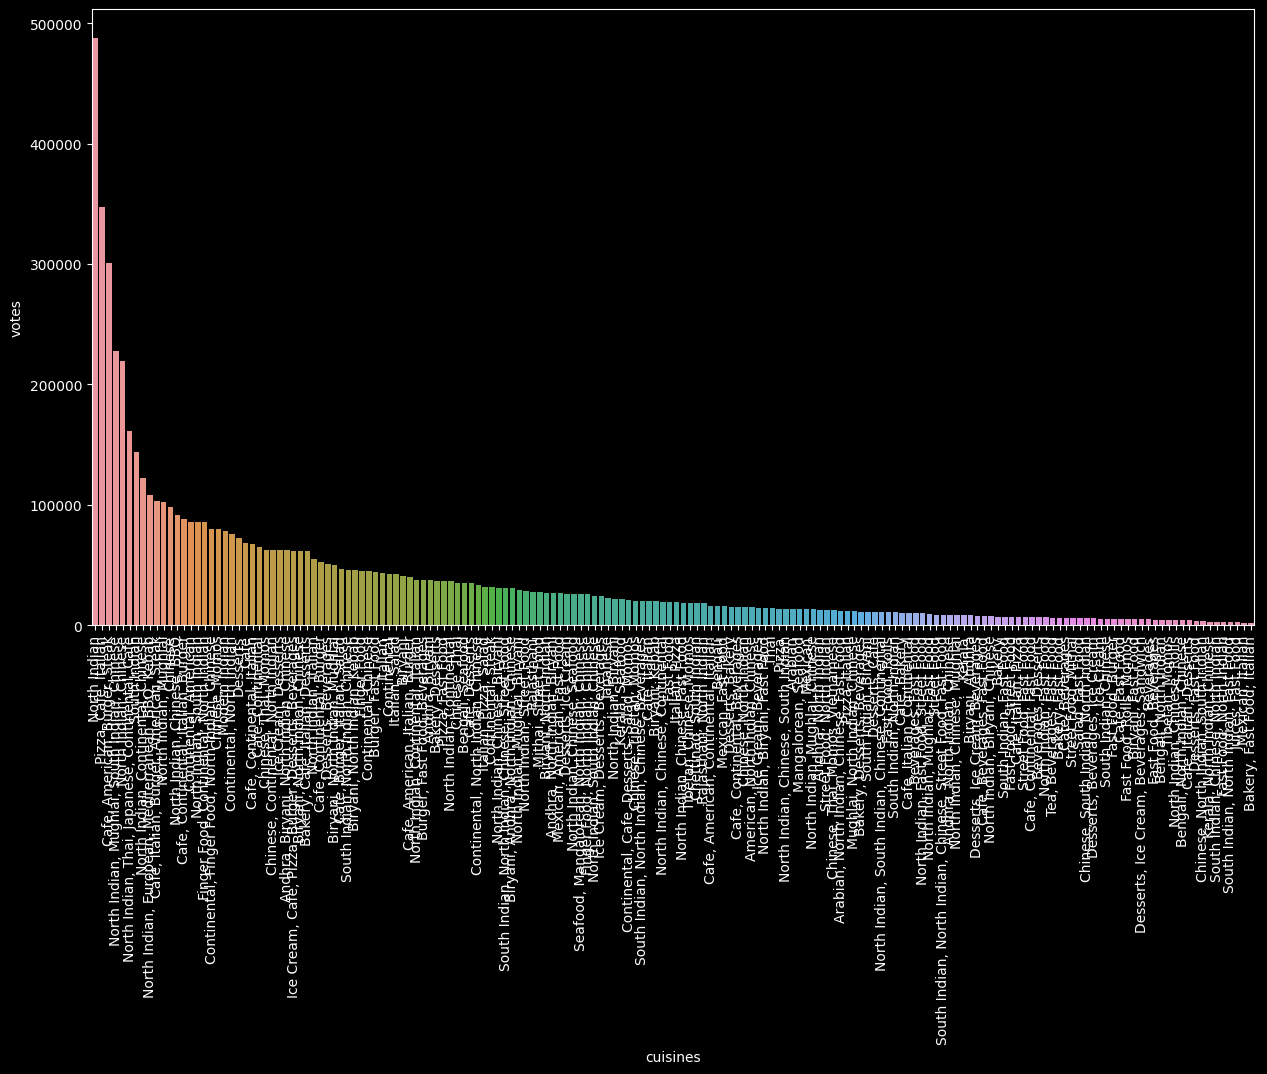

In [179]:
plt.figure(figsize = (15,8))
sns.barplot(x=df7.index ,y= df7['votes'])
plt.xticks(rotation = 90)

In [180]:
##Building model for prediction of location and rating